In [1]:
import os
import pandas as pd
import numpy as np
import torch
import torchvision
import torch.nn as nn
import torchvision.transforms as T
from torch.utils.data import DataLoader
import torch.optim as optim
import random

random.seed(42)
np.random.seed(42)
torch.manual_seed(42)

from utils.dataload import LandClassDataset

if torch.cuda.is_available():
    device = 'cuda'
elif torch.backends.mps.is_available():
    device = 'mps'
else:
    device = 'cpu'
print(f"Using device: {device}")

if os.path.isfile('split_file.csv') is False:
    with open('data/land_cover_representation/metadata.csv') as f:
        metadata = pd.read_csv(f)
    metadata = metadata[metadata['split_str'] == 'train']

transform = T.Compose([
    T.Resize((100, 100)),
    T.ToTensor()
])

dataset = LandClassDataset('data/land_cover_representation', transform=transform)

dataloader = DataLoader(dataset, batch_size=32, shuffle=True, num_workers=4)

print(len(dataloader))


ModuleNotFoundError: No module named 'torch'

In [2]:
random.seed(42)
np.random.seed(42)
torch.manual_seed(42)

# Load a pre-trained ResNet model
model = torchvision.models.resnet18(weights='DEFAULT')

# Modify the final layer to match the number of classes (66)
model.fc = nn.Linear(model.fc.in_features, 66)

# Move model to the appropriate device
model = model.to(device)

In [3]:
random.seed(42)
np.random.seed(42)
torch.manual_seed(42)

# Define loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)
num_epochs = 10
batch_size = 32

for epoch in range(num_epochs):
    model.train()  # Set the model to training mode
    running_loss = 0.0
    correct = 0
    total = 0
        
    for batch_idx, (images, labels) in enumerate(dataloader):
        images, labels = images.to(device), labels.to(device)
        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        
        running_loss += loss.item()
        
        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

        if (batch_idx + 1) % 100 == 0:
            batch_loss = running_loss / (batch_idx + 1)
            batch_accuracy = correct / total
            print(f"Epoch [{epoch+1}/{num_epochs}], Batch [{batch_idx+1}/{len(dataloader)}], "
                f"Loss: {batch_loss:.4f}, Accuracy: {batch_accuracy:.3f}")
    
    # Calculate epoch loss and accuracy
    epoch_loss = running_loss / len(dataloader)
    epoch_accuracy = correct / total
    
    print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {epoch_loss:.4f}, Accuracy: {epoch_accuracy:.3f}")


Epoch [1/10], Batch [100/7640], Loss: 1.8148, Accuracy: 0.515
Epoch [1/10], Batch [200/7640], Loss: 1.6938, Accuracy: 0.535
Epoch [1/10], Batch [300/7640], Loss: 1.6309, Accuracy: 0.541
Epoch [1/10], Batch [400/7640], Loss: 1.5850, Accuracy: 0.552
Epoch [1/10], Batch [500/7640], Loss: 1.5630, Accuracy: 0.553
Epoch [1/10], Batch [600/7640], Loss: 1.5370, Accuracy: 0.559
Epoch [1/10], Batch [700/7640], Loss: 1.5230, Accuracy: 0.562
Epoch [1/10], Batch [800/7640], Loss: 1.5050, Accuracy: 0.568
Epoch [1/10], Batch [900/7640], Loss: 1.4955, Accuracy: 0.569
Epoch [1/10], Batch [1000/7640], Loss: 1.4832, Accuracy: 0.572
Epoch [1/10], Batch [1100/7640], Loss: 1.4717, Accuracy: 0.574
Epoch [1/10], Batch [1200/7640], Loss: 1.4625, Accuracy: 0.576
Epoch [1/10], Batch [1300/7640], Loss: 1.4512, Accuracy: 0.578
Epoch [1/10], Batch [1400/7640], Loss: 1.4437, Accuracy: 0.580
Epoch [1/10], Batch [1500/7640], Loss: 1.4349, Accuracy: 0.582
Epoch [1/10], Batch [1600/7640], Loss: 1.4243, Accuracy: 0.584
E

61
{0: 1557,
 1: 2754,
 2: 1,
 3: 206,
 4: 1,
 5: 489,
 6: 49,
 7: 5,
 8: 3485,
 9: 1,
 10: 553,
 11: 194,
 12: 12274,
 13: 90,
 14: 121,
 15: 2,
 16: 1,
 17: 1017,
 18: 2,
 19: 4443,
 20: 1,
 21: 18897,
 22: 134,
 23: 60,
 24: 90484,
 25: 54,
 26: 141,
 27: 11,
 28: 49792,
 29: 3299,
 30: 4,
 31: 2320,
 32: 15231,
 33: 10359,
 34: 16955,
 35: 4273,
 36: 598,
 37: 14,
 38: 58,
 39: 296,
 40: 42771,
 41: 307,
 42: 16,
 43: 6334,
 44: 2527,
 45: 219,
 46: 1,
 47: 592,
 48: 4,
 49: 75,
 50: 3280,
 51: 1,
 52: 207,
 53: 8,
 54: 76,
 55: 2697,
 56: 161,
 57: 62,
 58: 410,
 59: 19,
 60: 7}


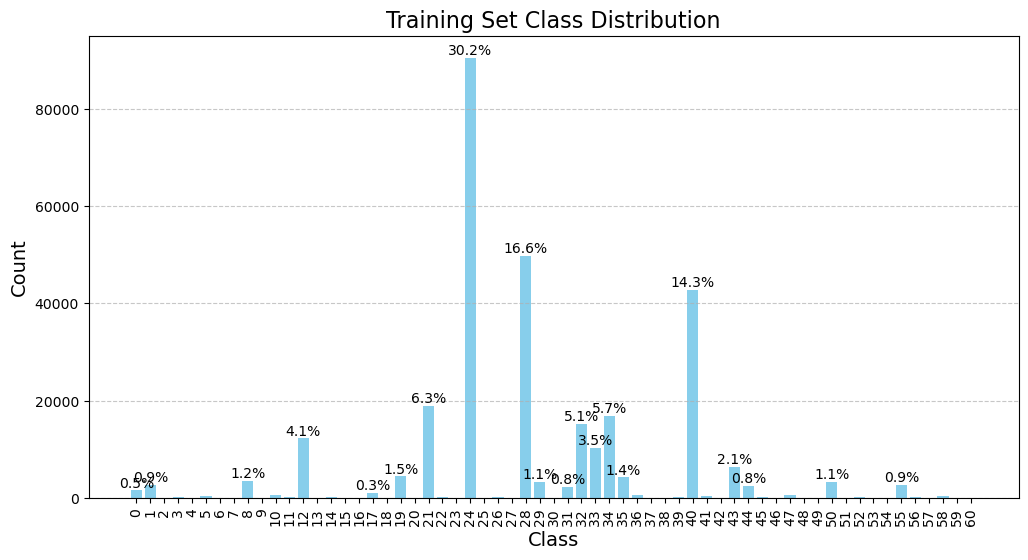

In [1]:
%run stats.py